# FIT1043 - ASSIGNMENT 2
## Name: Duc Thanh Vinh Nguyen
## Student ID: 32952260

### Task A: Data Wrangling and Analysis on ARD Dataset

### 1. Read, Extract and Formating Data: "Australian_Road_Deaths.csv" 

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 7.5]

# Extract data from csv file
road_deaths_data = pd.read_csv("Australian_Road_Deaths.csv")

# Turn data into Data Frame
road_deaths_df = pd.DataFrame(road_deaths_data)

# Format Year and Month
road_deaths_df["YYYYMM"] = pd.to_datetime(road_deaths_df["YYYYMM"], format='%Y%m')

road_deaths_df["YYYYMM"] = road_deaths_df["YYYYMM"].dt.to_period("M")

road_deaths_df

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20212133,Vic,2021-09,Sunday,0:30:00,Single,NaN,NaN,NaN,Motorcycle rider,...,89,12,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Night
1,20214022,SA,2021-09,Saturday,23:31:00,Multiple,No,No,No,Pedestrian,...,0,6,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Night
2,20212096,Vic,2021-09,Saturday,23:00:00,Single,NaN,NaN,NaN,Car passenger,...,0,2,Inner Regional Australia,Hume,Wangaratta (RC),Access Road,No,No,17_to_25,Night
3,20212145,Vic,2021-09,Saturday,22:25:00,Single,NaN,NaN,NaN,Car driver,...,117,5,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Night
4,20212075,Vic,2021-09,Saturday,5:15:00,Single,NaN,NaN,NaN,Motorcycle rider,...,92,11,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,20142068,Vic,2014-01,Monday,18:20:00,Single,No,No,No,Car passenger,...,0,6,NaN,NaN,NaN,NaN,No,No,26_to_39,Night
9136,20141285,NSW,2014-01,Tuesday,20:50:00,Single,No,No,No,Car driver,...,91,43,NaN,NaN,NaN,NaN,No,No,65_to_74,Night
9137,20143125,Qld,2014-01,Friday,1:00:00,Single,No,No,No,Motorcycle pillion Car passenger,...,0,1,NaN,NaN,NaN,NaN,No,No,17_to_25,Night
9138,20143065,Qld,2014-01,Friday,10:00:00,Multiple,No,No,Yes,Car driver,...,75,12,NaN,NaN,NaN,NaN,No,No,26_to_39,Day


### 2. Questions  

#### A1. Data size

#### Code: 

In [2]:
road_deaths_df.shape

(9140, 22)

##### Answer and Explanation: 

* There are 9140 rows and 22 columns in the dataset

#### A2. The number of unique values in some columns

##### Code: 

In [3]:
# The number of unique values for: 
# National Remoteness Areaa
# SA4 Name 2016
# National LGA Name 2017
# National Road Type
unique_count = road_deaths_df[["National Remoteness Areas", "SA4 Name 2016", "National LGA Name 2017", "National Road Type"]].nunique(dropna = False)
unique_count = pd.DataFrame(unique_count)
unique_count.rename(columns = {0:"Number of unique values"}, inplace=True)
unique_count

,Number of unique values
National Remoteness Areas,6
SA4 Name 2016,89
National LGA Name 2017,501
National Road Type,10


##### Answer and Explanation: 

* There are 6 unique values for National Remoteness Areas 
* There are 89 unique values for SA4 Name 2016
* There are 501 unique values for National LGA Name 2017
* There are 10 unique values for National Road Type

(All above numbers include NaN)

#### A3. Missing values and duplicates

##### Code: 

In [4]:
# 1. How many rows contain missing values in this dataset?
road_deaths_df.isna().any(axis=1).sum()

2287

In [5]:
# 2. List the months with no missing values in them.
# I list every months that has missing values in them and I can list all the months that not have missing values by 
# substract every months in the dataframe to the months with missing values
months_with_NaN = road_deaths_df[road_deaths_df.isna().any(axis=1)]
months_with_NaN = months_with_NaN["YYYYMM"].dt.month.drop_duplicates()
months_with_NaN = pd.DataFrame(months_with_NaN).sort_values(by="YYYYMM")
months_with_NaN = months_with_NaN.reset_index(drop=True)
months_with_NaN.rename(columns={"YYYYMM":"Month"}, inplace=True)
months_with_NaN
# we have 12 months having missing values in them => there are 0 months with no missing values in them

,Month
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [6]:
# 3. 
# Remove the records with missing values.
data_without_NaN = road_deaths_df.dropna(axis = 0, how = 'any')  # drop every rows that have NaN

# Remove the records with Undetermined values
data_without_NaN = data_without_NaN[data_without_NaN["National Road Type"] != "Undetermined"]

# Remove the records with Unspecified values
data_without_NaN = data_without_NaN[data_without_NaN["Gender"] != "Unspecified"]

data_without_NaN.reset_index(drop=True, inplace=True)

data_without_NaN

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20213034,Qld,2021-09,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,41,3,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night
1,20213026,Qld,2021-09,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,20,3,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night
2,20213092,Qld,2021-09,Saturday,2:00:00,Single,No,No,No,Car driver,...,53,12,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night
3,20214053,SA,2021-09,Thursday,21:00:00,Single,No,No,No,Car driver,...,140,7,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night
4,20213178,Qld,2021-09,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,71,29,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,20144083,SA,2014-01,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,20,14,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day
6834,20145108,WA,2014-01,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,142,15,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day
6835,20144022,SA,2014-01,Monday,9:35:00,Single,No,No,No,Pedestrian,...,0,45,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day
6836,20145072,WA,2014-01,Tuesday,21:30:00,Single,No,No,No,Car driver,...,74,43,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night


In [7]:
# 4. Remove duplicates
clean_dataset = data_without_NaN.drop_duplicates()

clean_dataset.reset_index(drop=True, inplace=True)
clean_dataset

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20213034,Qld,2021-09,Saturday,4:00:00,Multiple,No,No,No,Motorcycle rider,...,41,3,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night
1,20213026,Qld,2021-09,Wednesday,23:00:00,Multiple,No,No,No,Car passenger,...,20,3,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night
2,20213092,Qld,2021-09,Saturday,2:00:00,Single,No,No,No,Car driver,...,53,12,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night
3,20214053,SA,2021-09,Thursday,21:00:00,Single,No,No,No,Car driver,...,140,7,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night
4,20213178,Qld,2021-09,Sunday,21:00:00,Multiple,No,No,No,Motorcycle rider,...,71,29,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,20144083,SA,2014-01,Friday,11:10:00,Multiple,No,Yes,No,Car passenger,...,20,14,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day
6818,20145108,WA,2014-01,Wednesday,11:47:00,Single,No,No,No,Motorcycle rider,...,142,15,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day
6819,20144022,SA,2014-01,Monday,9:35:00,Single,No,No,No,Pedestrian,...,0,45,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day
6820,20145072,WA,2014-01,Tuesday,21:30:00,Single,No,No,No,Car driver,...,74,43,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night


##### Answer and Explanation: 
1. How many rows contain missing values (Unspecified or Undetermined or blank) in this dataset?
- There are 2287 rows containing missing values
2. List the months with no missing values in them.
- There are 12 months with missing values in them, therefore there are 0 month with no missing values

#### A4. Number of crashes in each month

##### Code: 

In [8]:
# List the number of crashes in each month
number_of_crashes_per_month = clean_dataset["YYYYMM"].dt.month.value_counts()
number_of_crashes_per_month = pd.DataFrame(number_of_crashes_per_month).rename_axis("Month")
number_of_crashes_per_month.rename(columns = {"YYYYMM" : "Number of crashes"}, inplace = True)
sorted_number_of_crashes_by_month = number_of_crashes_per_month.sort_index()
sorted_number_of_crashes_by_month

,Number of crashes
Month,
1,593
2,514
3,654
4,575
5,554
6,556
7,596
8,637
9,531


In [9]:
# Which two months are the number of crashes at their largest
top_2_months = number_of_crashes_per_month[0:2]
top_2_months

,Number of crashes
Month,
3,654
8,637


##### Answer and Explanation: 
* 2 months that the number of crashes at their largest are March and August, which have 655 and 643 crashes, respectively.

#### A5. Investigating crashes over different months for specific road user

##### Code: 

In [10]:
# 1. Compute the average number of crashes against Month for car drives
# a. Extract Year and Month as seperate columns
year_value = clean_dataset["YYYYMM"].dt.year
month_value = clean_dataset["YYYYMM"].dt.month
clean_dataset.insert(loc=3, column="Year", value=year_value)
clean_dataset.insert(loc=4, column="Month", value=month_value)
clean_dataset

,Crash ID,State,YYYYMM,Year,Month,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20213034,Qld,2021-09,2021,9,Saturday,4:00:00,Multiple,No,No,...,41,3,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night
1,20213026,Qld,2021-09,2021,9,Wednesday,23:00:00,Multiple,No,No,...,20,3,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night
2,20213092,Qld,2021-09,2021,9,Saturday,2:00:00,Single,No,No,...,53,12,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night
3,20214053,SA,2021-09,2021,9,Thursday,21:00:00,Single,No,No,...,140,7,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night
4,20213178,Qld,2021-09,2021,9,Sunday,21:00:00,Multiple,No,No,...,71,29,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,20144083,SA,2014-01,2014,1,Friday,11:10:00,Multiple,No,Yes,...,20,14,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day
6818,20145108,WA,2014-01,2014,1,Wednesday,11:47:00,Single,No,No,...,142,15,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day
6819,20144022,SA,2014-01,2014,1,Monday,9:35:00,Single,No,No,...,0,45,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day
6820,20145072,WA,2014-01,2014,1,Tuesday,21:30:00,Single,No,No,...,74,43,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night


In [11]:
# b. Compute the number of crashes by both Year and Month for car drivers
number_of_crashes_by_year_and_month = clean_dataset[["Year","Month","Road User"]].value_counts()
number_of_crashes_by_year_and_month = pd.DataFrame(number_of_crashes_by_year_and_month)
number_of_crashes_by_year_and_month.rename(columns={0:"Number of crashes"}, inplace=True)
number_of_crashes_by_year_and_month.reset_index(inplace=True)
car_crashes = number_of_crashes_by_year_and_month[number_of_crashes_by_year_and_month["Road User"] == "Car driver"]
car_crashes = car_crashes.sort_values(by=["Year", "Month"]).reset_index(drop=True)
car_crashes

,Year,Month,Road User,Number of crashes
0,2014,1,Car driver,7
1,2014,2,Car driver,10
2,2014,3,Car driver,12
3,2014,4,Car driver,9
4,2014,5,Car driver,6
...,...,...,...,...
88,2021,5,Car driver,33
89,2021,6,Car driver,41
90,2021,7,Car driver,43
91,2021,8,Car driver,39


In [12]:
# c. Based on task A5-1-b result, compute again the average number of crashes against Month.
# For each month, the average number of crashes is calculated over different years for which we have collected data for. 
months_group = car_crashes.groupby(["Month"])
months_sum = months_group["Number of crashes"].sum()
months_count = months_group["Number of crashes"].count()
average_crashes = pd.DataFrame(months_sum / months_count)
average_crashes.rename(columns={"Number of crashes":"Average number of crashes"}, inplace=True)
average_crashes = pd.DataFrame(average_crashes)
average_crashes

,Average number of crashes
Month,
1,34.375000
2,28.750000
3,39.250000
4,33.375000
5,32.750000
6,33.500000
7,34.000000
8,38.750000
9,34.250000


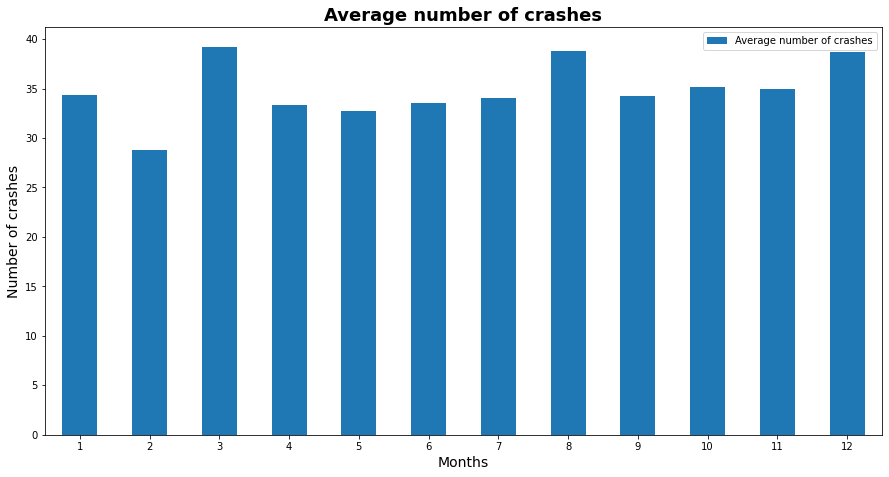

In [13]:
# 2. Draw a chart showing the average number of crashes over different months computed in task A5-1.
average_crashes.plot.bar()
plt.title('Average number of crashes', weight='bold', size=18)
plt.xlabel('Months', size=14)
plt.ylabel('Number of crashes', size=14)
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

##### Answer and Explanation: 
* The bar chart shows that February has the lowest average number of crashes amongst every months. 
* March, August and December are top 3 months that the average number of crashes are largest, which are around 40 crashes each month.

#### A6. Exploring Speed, National Road Type, and Age
Now look at the Speed, National Road Type, and Age columns and answer the following questions:

##### Code: 

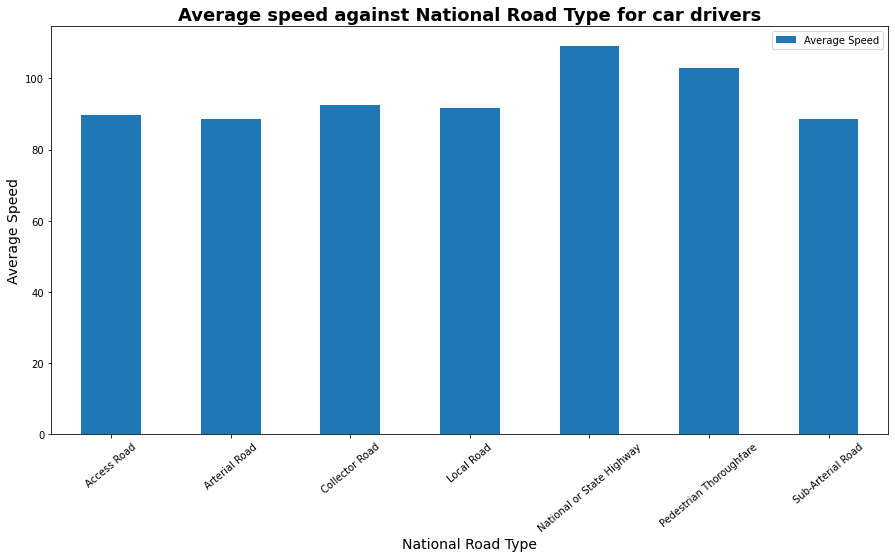

In [14]:
# 1. Draw a chart showing the average speed against National Road Type for car drivers
speed_against_road_type = clean_dataset[["National Road Type", "Speed", "Road User"]]
speed_against_road_type = pd.DataFrame(speed_against_road_type)
speed_against_road_type = speed_against_road_type[speed_against_road_type["Road User"] == "Car driver"]
speed_against_road_type.reset_index(inplace=True, drop=True)
road_type_group = speed_against_road_type.groupby(["National Road Type"])
average_speed = road_type_group["Speed"].sum() / road_type_group["Speed"].count()
average_speed = pd.DataFrame(average_speed).rename(columns = {"Speed":"Average Speed"})

bar_chart = average_speed.plot.bar()
plt.title('Average speed against National Road Type for car drivers', weight='bold', size=18)
plt.xlabel('National Road Type', size=14)
plt.ylabel('Average Speed', size=14)
plt.xticks(rotation=40, horizontalalignment="center")
plt.show()

In [15]:
# 2. Due to measurement error, there are some counter-intuitive values in Age column. 
# Identify those values:
counter_intuitive_values = clean_dataset.loc[clean_dataset["Age"] - clean_dataset["Driving experience"] < 0, ["Age", "Road User", "Driving experience"]]
counter_intuitive_values = pd.DataFrame(counter_intuitive_values)
counter_intuitive_values

,Age,Road User,Driving experience
1,2,Car passenger,3
19,-999,Car driver,40
22,20,Car driver,62
46,-999,Car driver,40
58,20,Car driver,63
...,...,...,...
6391,0,Car passenger,2
6524,0,Car passenger,2
6591,1,Car passenger,5
6717,38,Pedal cyclist,61


In [16]:
# save a copy of the dataset before replacing with 0 for task A9
task_a9 = clean_dataset.copy()
# Replace counter-intuitive values with 0
clean_dataset.loc[clean_dataset["Age"] - clean_dataset["Driving experience"] < 0, "Age"] = 0
clean_dataset

,Crash ID,State,YYYYMM,Year,Month,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20213034,Qld,2021-09,2021,9,Saturday,4:00:00,Multiple,No,No,...,41,3,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night
1,20213026,Qld,2021-09,2021,9,Wednesday,23:00:00,Multiple,No,No,...,20,3,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night
2,20213092,Qld,2021-09,2021,9,Saturday,2:00:00,Single,No,No,...,53,12,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night
3,20214053,SA,2021-09,2021,9,Thursday,21:00:00,Single,No,No,...,140,7,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night
4,20213178,Qld,2021-09,2021,9,Sunday,21:00:00,Multiple,No,No,...,71,29,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,20144083,SA,2014-01,2014,1,Friday,11:10:00,Multiple,No,Yes,...,20,14,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day
6818,20145108,WA,2014-01,2014,1,Wednesday,11:47:00,Single,No,No,...,142,15,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day
6819,20144022,SA,2014-01,2014,1,Monday,9:35:00,Single,No,No,...,0,45,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day
6820,20145072,WA,2014-01,2014,1,Tuesday,21:30:00,Single,No,No,...,74,43,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night


##### Answer and Explanation: 
* There are 62 rows containing counter-intuitive values, because the age of the driver are negative or smaller than the years of driving experience.

#### A7. Relationship between Age, Speed, and Driving Experiences 

##### Code: 

In [17]:
clean_dataset["Road User"].value_counts()

Car driver                          3234
Car passenger                       1228
Motorcycle rider                    1153
Pedestrian                           936
Pedal cyclist                        210
Motorcycle pillion Car passenger      32
Other vehicle driver                  29
Name: Road User, dtype: int64

In [18]:
# 1. Compute pairwise correlation of columns, Age, Speed, and Driving Experiences for vehicle drivers (such as Motorcycle rider). 
# Which two features have the highest linear association?
list_of_drivers = ["Car driver", "Motorcycle rider", "Pedal cyclist", "Other vehicle driver"]
riders = clean_dataset[clean_dataset["Road User"].isin(list_of_drivers)]
riders = riders[["Road User", "Age", "Speed", "Driving experience"]]
riders = riders.sort_values("Road User")
riders.reset_index(inplace=True, drop=True)
riders.corr()

,Age,Speed,Driving experience
Age,1.000000,-0.003887,0.927045
Speed,-0.003887,1.000000,-0.007659
Driving experience,0.927045,-0.007659,1.000000


In [19]:
# 2. Now let's look at the relationship between the number of crashes and Driving Experiences.
# To do this, first compute the number of crashes against Driving Experiences for vehicle drivers, 
list_of_drivers = ["Car driver", "Motorcycle rider", "Pedal cyclist", "Other vehicle driver"]
number_of_crashes_against_ex = clean_dataset[clean_dataset["Road User"].isin(list_of_drivers)]
number_of_crashes_against_ex = number_of_crashes_against_ex[["Driving experience"]].value_counts()
number_of_crashes_against_ex = pd.DataFrame(number_of_crashes_against_ex)
number_of_crashes_against_ex.sort_index(inplace=True)
number_of_crashes_against_ex.rename(columns = {0:"Number of crashes"}, inplace=True)
number_of_crashes_against_ex.reset_index(inplace=True)
number_of_crashes_against_ex

,Driving experience,Number of crashes
0,1,43
1,2,125
2,3,127
3,4,236
4,5,311
5,6,244
6,7,234
7,8,110
8,11,164
9,12,380


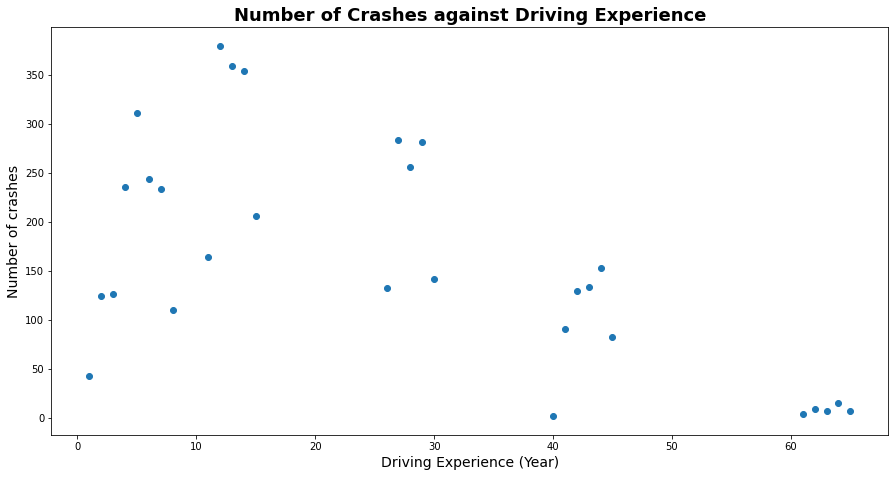

In [20]:
# Plot the values of these two features against each other. 
plt.scatter(number_of_crashes_against_ex["Driving experience"], number_of_crashes_against_ex["Number of crashes"])
plt.title('Number of Crashes against Driving Experience', weight='bold', size=18)
plt.xlabel('Driving Experience (Year)', size=14)
plt.ylabel('Number of crashes', size=14)
plt.show()

##### Answer and Explanation: 
1. Which two features have the highest linear association?
* Age and Driving experience have the highest linear association.
2. Is there any relationship between these two features?
* Looking from an overall perspective, we can see that the more driving experience years the drivers have, the less crashes happen.
* Drivers having from 10 years to 15 years of driving experience cause the highest number of crashes.



#### A8. Investigating yearly trend of crash 

##### Code: 

In [21]:
# Compute the number of crashes by year
crashes_by_years = clean_dataset["Year"].value_counts()
crashes_by_years = pd.DataFrame(crashes_by_years)
crashes_by_years.reset_index(inplace=True)
crashes_by_years.rename(columns = {"Year": "Number of crashes", "index":"Year"}, inplace=True)
crashes_by_years = crashes_by_years.sort_values("Year")
crashes_by_years.reset_index(inplace=True, drop=True)
crashes_by_years

,Year,Number of crashes
0,2014,301
1,2015,939
2,2016,733
3,2017,957
4,2018,1108
5,2019,1173
6,2020,926
7,2021,685


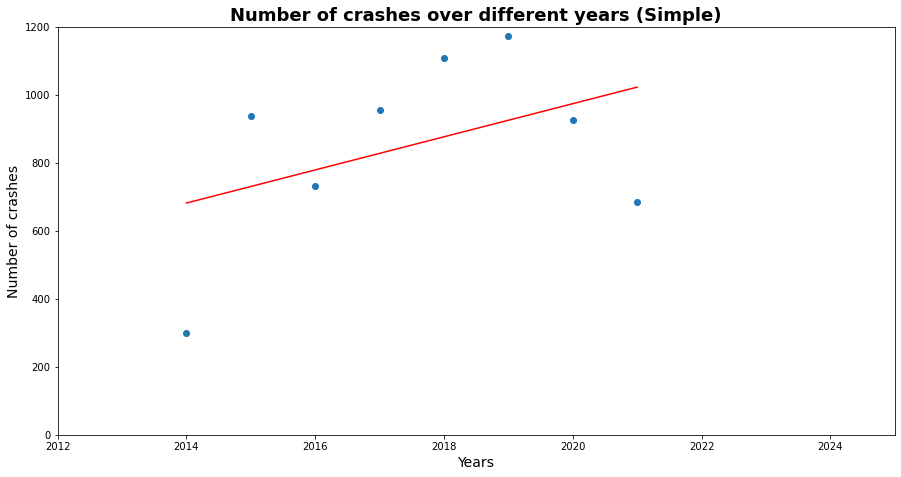

In [22]:
# 1. Fit a linear regression using Python to this data (The number of crashes over different years) and plot the linear fit. 
# Simple Linear Regression

x = crashes_by_years["Year"].values.reshape(-1, 1)
y = crashes_by_years["Number of crashes"].values.reshape(-1, 1) 

# Using simple linear regression to fit the data
model_1 = LinearRegression()
model_1.fit(x, y)
y_predict = model_1.predict(x)

# set the limit of x asix and y axis
plt.ylim(0, 1200)
plt.xlim(2012, 2025)

# plot the model
plt.scatter(x, y)
plt.plot(x, y_predict, color='red')
plt.title("Number of crashes over different years (Simple)", weight='bold', size=18)
plt.xlabel('Years', size=14)
plt.ylabel('Number of crashes', size=14)
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()


In [23]:
# 2. Use the linear fit to predict the number of crashes in 2022

# we get the formula: number_of_crarshes = slope * year + intercept
# predict the number of crashes in 2022:

crashes_in_2022 = int(model_1.predict([[2022]]))
crashes_in_2022

1072

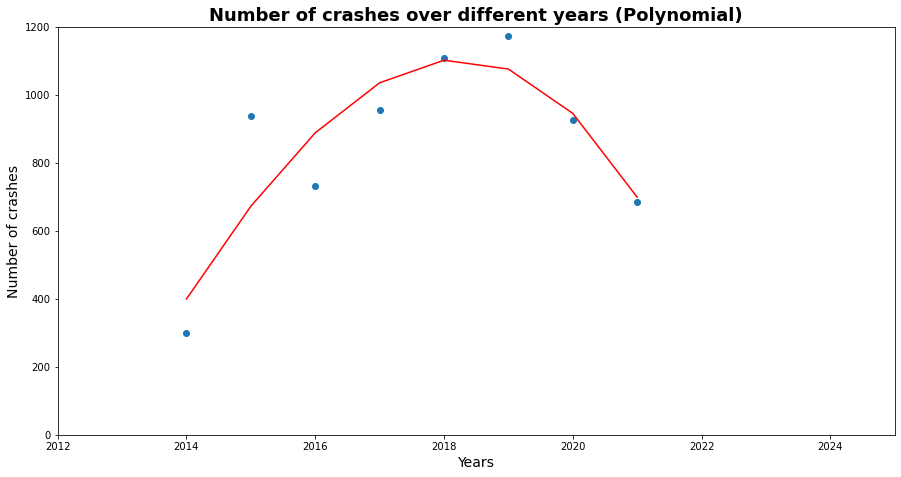

In [24]:
# 3. Can you think of a better model that well captures the trend of yearly crash?
# Develop a new model and explain why it is better suited for this task

# Polynomial Linear Regression
x = crashes_by_years["Year"].values.reshape(-1, 1)
y = crashes_by_years["Number of crashes"].values.reshape(-1, 1) 

x_ = PolynomialFeatures(degree=4).fit_transform(x)

# create the model
model_2 = LinearRegression().fit(x_, y)

y_predict = model_2.predict(x_)

plt.ylim(0, 1200)
plt.xlim(2012, 2025)

plt.scatter(x, y)
plt.plot(x_, y_predict, color="red")
plt.title("Number of crashes over different years (Polynomial)", weight='bold', size=18)
plt.xlabel('Years', size=14)
plt.ylabel('Number of crashes', size=14)
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

In [25]:
# 4. Use your new model to predict the number of crashes in 2022
crashes_in_2022 = [2022]
crashes_in_2022 = pd.DataFrame(crashes_in_2022)
crashes_in_2022 = PolynomialFeatures(degree=4).fit_transform(crashes_in_2022)
crashes_in_2022 = int(model_2.predict(crashes_in_2022))
crashes_in_2022

324

##### Answer and Explanation: 
1. Fit simple linear regression to the data
2. The number of crashes in 2022 using simple linear regression: 1072
3. From my own perspective, I think that using polynomial linear regression with fourth order will help us capture the trend of yearly crash more correctly. it is clearly to see that if we use simple linear regression, the straight line cannot fit all the data points (especially the data points in year 2014 and 2021, which show there may be a downward trend in 2022). 
4. The number of crashes in 2022 using polynomial linear regression: 324

#### A9. Filling in missing values 

In [26]:
# Rather than replacing some counter-intuitive values with zero in task A6, use a better approach to fill in the values
counter_intuitive_values["Road User"].value_counts()

Car passenger           31
Pedestrian              20
Car driver               6
Other vehicle driver     2
Pedal cyclist            2
Motorcycle rider         1
Name: Road User, dtype: int64

##### Code: 

In [27]:
# fill values for ["Pedal cyclist"]
task_a9["Age"] = np.where((task_a9["Age"] < task_a9["Driving experience"]) & (task_a9["Road User"] == "Pedal cyclist"), task_a9["Driving experience"] + 5, task_a9["Age"])

# fill values for  ["Car driver", "Other vehicle driver", "Motorcycle rider"]
drivers_lists = ["Car driver", "Motorcycle rider","Other vehicle driver"]
task_a9["Age"] = np.where((task_a9["Age"] < task_a9["Driving experience"]) & (task_a9["Road User"].isin(drivers_lists)), task_a9["Driving experience"] + 18, task_a9["Age"])

# fill values for ["Pedestrian", "Car passenger"]
non_drivers_list = ["Pedestrian", "Car passenger"]
task_a9["Age"] = np.where((task_a9["Age"] < task_a9["Driving experience"]) & (task_a9["Road User"].isin(non_drivers_list)), task_a9["Driving experience"], task_a9["Age"])

##### Answer and Explanation: 

* Calculating the drivers' age based on their years of driving experience, and the type of Road User they are. The reason we can calculate the age by driving experience is because in task A7, we have shown that driving experience and age have a very high linear association. 

* There are 6 types of road user containing counter-intuitive values, therefore we can specify how to calculate their age based on the type of Road User:
    + If they are ["Car driver", "Other vehicle driver", "Motorcycle rider"], their age will follow this function: age = driving experience + 18. (We assume that they will have to be at least 18 years old in order to be able to drive car or motor)
    + If they are ["Pedestrian", "Car passenger"], their age will follow this function: age = driving experience
    + If they are ["Pedal cyclist"], their age will follow this function: age = driving experience + 5 (We assume that a child learn how to ride a bike when the child was 5 years old)

### Task B: Decision Tree Classification on Song Popularity Dataset and K-means Clustering on Other Data

#### B1. Classification
We want to build a predictive model to predict song popularity for 5 popularity levels in the dataset
based on features (You need to figure out which features to use). The song popularity column
takes the following values: {1,2,3,4,5}, in which the higher the number the more popular the song
is. 5 means very popular and 1 means less popular

### 1. Read, Extract and Formating Data: "song_data.csv" 

In [28]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 7.5]

# Extract data from csv file
song_data = pd.read_csv("song_data.csv")
song_data = pd.DataFrame(song_data)
song_data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,4,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,4,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,4,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,4,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,3,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,3,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,3,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),2,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,3,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


### 2. Choosing features

* Choosing features by computing pairwise correlation 
    - We can see that the linear association of every features (except song_name and song_popularity) to song_popularity are not greatly different from each other. Therefore, I will use all features in the data except song_name and song_popularity

In [29]:
song_data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.020966,-0.065793,0.104594,0.001822,-0.128550,-0.007539,-0.038321,0.100378,-0.006604,0.022380,-0.019056,0.036178,-0.054281
song_duration_ms,-0.020966,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421
acousticness,-0.065793,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670
danceability,0.104594,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,0.001822,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742
instrumentalness,-0.128550,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570
key,-0.007539,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356
liveness,-0.038321,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789
loudness,0.100378,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696
audio_mode,-0.006604,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558


### 3. Questions

##### 1. Divide the data set into a 75% training set and a 25% testing set using only the features relevant for classification.

In [30]:
features = song_data.iloc[:, 2:]  
popularity = song_data.iloc[:, 1]    
features_train, features_test, popularity_train, popularity_test = train_test_split(features, popularity, test_size = 0.25, random_state = 0)
popularity

0        4
1        4
2        4
3        4
4        3
        ..
18830    3
18831    3
18832    2
18833    3
18834    3
Name: song_popularity, Length: 18835, dtype: int64

##### 2. Use feature scaling and train a decision tree model 

In [31]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [32]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(features_train, popularity_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

##### 3. Using the test set, predict using the decision tree and compute the confusion matrix and the accuracy of classification

In [33]:
# Predicting the Test set results
popularity_pred = classifier.predict(features_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(popularity_test, popularity_pred)
cm


array([[111,  70, 152, 125,  13],
       [ 90, 205, 234, 172,  31],
       [156, 253, 745, 397,  40],
       [117, 118, 320, 904,  59],
       [  4,   9,  14,  17, 353]], dtype=int64)

In [34]:
# Accuracy of decision trees
from sklearn.metrics import balanced_accuracy_score
dt_accuracy = accuracy_score(popularity_test, popularity_pred)
dt_accuracy
print("The accuracy of Decision Tree Classification is {0:.2f}%".format(dt_accuracy*100))

The accuracy of Decision Tree Classification is 49.22%


##### 4. Discuss your findings from the confusion matrix and accuracy. You should consider other performance metrics you learnt in lecture 7 to answer this question
* The accuracy of Decision Tree Classification in predicting the popularity of the song is 49.22%
* From the confusion matrix above, we can calculate the values of True Positive, True Negative, False Positive, and False Negative of each class from 1 to 5 (representing the popularity level of songs from 1 to 5) 
* And from these values, we can calculate some of performance metrics, including: Accuracy, Precision, Recall, Specificity, and False Positive Rate of each class from class 1 to class 5


In [35]:
# calculate True Positive, True Negative, False Positive, and False Negative
# after calculating, store those values in a list of lists
array = cm.copy()
performance_metrics = []
l = len(array)
total_sum = 0
for i in range(l):
    row_sum = 0
    column_sum = 0
    for j in range(l):
        row_sum += array[i][j]
        column_sum += array[j][i]
        if j == i:
            tp = array[i][j]
        total_sum += array[i][j]
    fp = row_sum - tp
    fn = column_sum - tp
    performance_metrics.append([tp, fp, fn])

for class_metric in performance_metrics:
    tn = total_sum
    for metric in class_metric:
        tn = tn - metric
    class_metric.append(tn)

classes = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]
performance_metrics = pd.DataFrame(performance_metrics, index=classes )
performance_metrics.rename(columns = {
    0: "True Positive",
    1: "False Positive",
    2: "False Negative",
    3: "True Negative"
}, inplace=True)
performance_metrics

,True Positive,False Positive,False Negative,True Negative
Class 1,111,360,367,3871
Class 2,205,527,450,3527
Class 3,745,846,720,2398
Class 4,904,614,711,2480
Class 5,353,44,143,4169


In [36]:
# Calculating Accuracy, Precision, Recall, Specificity, and False Positive Rate
tp = performance_metrics["True Positive"]
fp = performance_metrics["False Positive"]
fn = performance_metrics["False Negative"]
tn = performance_metrics["True Negative"]
performance_metrics["Accuracy"] = (tp + tn) / (tp + fp + fn + tn)
performance_metrics["Precision"] = tp / (tp + fp)
performance_metrics["Sensitivity"] = tp / (tp + fn)
performance_metrics["Specificity"] = tn / (tn + fp)
performance_metrics["Negative Predictive Value"] = tn / (tn + fn)
performance_metrics

,True Positive,False Positive,False Negative,True Negative,Accuracy,Precision,Sensitivity,Specificity,Negative Predictive Value
Class 1,111,360,367,3871,0.845615,0.235669,0.232218,0.914914,0.913403
Class 2,205,527,450,3527,0.792525,0.280055,0.312977,0.870005,0.886849
Class 3,745,846,720,2398,0.667445,0.468259,0.508532,0.739211,0.769083
Class 4,904,614,711,2480,0.718624,0.595520,0.559752,0.801551,0.777186
Class 5,353,44,143,4169,0.960289,0.889169,0.711694,0.989556,0.966837


* The Accuracy, Specificity and Negative Predictive Value are high among every class, in contrast, Precision and Sensitivity are low in almost every class except in Class 5.
* We can see that the Decision Tree more accurately classify which songs will be in class 5 (most popular songs). But this seems to be decreased when coming down to lower class

#### B2. Clustering
* Choose two numerical features in your dataset and apply k-means clustering on your data into k clusters in Python, where k>=2.
* Visualise the data as well as the results of the k-means clustering, and describe your findings about the identified clusters. Ideally each cluster is shown in a different colour.

* Dataset: Australian domestic flights 
* Link: https://drive.google.com/file/d/1Q8g9E_4Q_rmSBSpO-6ycYMy6OniFdR-h/view?usp=sharing

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 7.5]

# Extract data from csv file
flight_data = pd.read_csv("Australian_domestic_flights.csv")  
flight_data = pd.DataFrame(flight_data)
flight_data

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num
0,ADELAIDE,ALICE SPRINGS,30682,15743,143,81.8,1316,20717788,25327369,19246,1984,1
1,ADELAIDE,BRISBANE,30682,3781,32,89.8,1622,6132782,6829379,4210,1984,1
2,ADELAIDE,CANBERRA,30682,1339,12,94.7,972,1301508,1374348,1414,1984,1
3,ADELAIDE,DARWIN,30682,3050,33,66.8,2619,7987950,11958009,4566,1984,1
4,ADELAIDE,GOLD COAST,30682,1596,16,88.5,1607,2564772,2898047,1803,1984,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23595,SYDNEY,WAGGA WAGGA,43678,16546,474,68.7,367,6072382,8841764,24092,2019,8
23596,SYDNEY,WAGGA WAGGA,43709,16646,490,67.9,367,6109082,8998840,24520,2019,9
23597,SYDNEY,WAGGA WAGGA,43739,17146,503,68.5,367,6292582,9180138,25014,2019,10
23598,SYDNEY,WAGGA WAGGA,43770,16171,468,69.2,367,5934757,8574588,23364,2019,11


In [38]:
# choosing 2 numercial features: Seats and Passenger_Load_Factor
data = flight_data[["Seats", "Passenger_Load_Factor"]].copy()

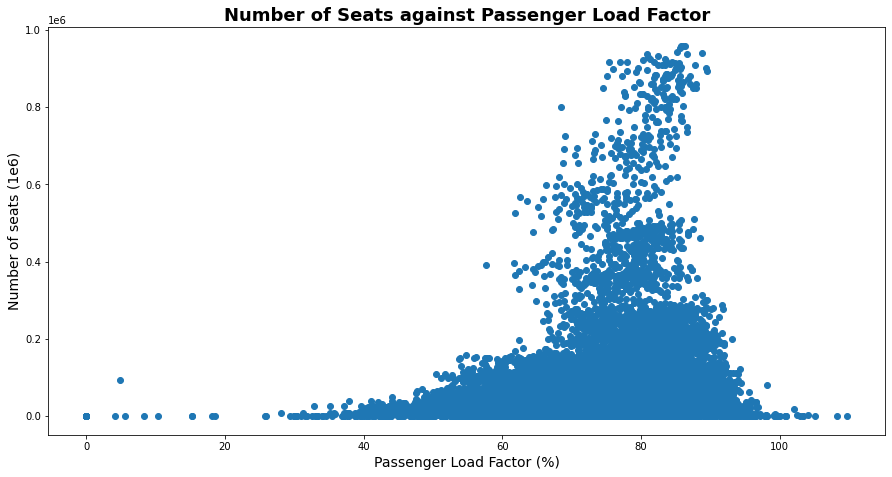

In [39]:
plt.scatter(x = data["Passenger_Load_Factor"], y = data["Seats"])
plt.xlabel("Passenger Load Factor (%)", size=14)
plt.ylabel("Number of seats (1e6)", size=14)
plt.title("Number of Seats against Passenger Load Factor", weight="bold", size=18)
plt.show()

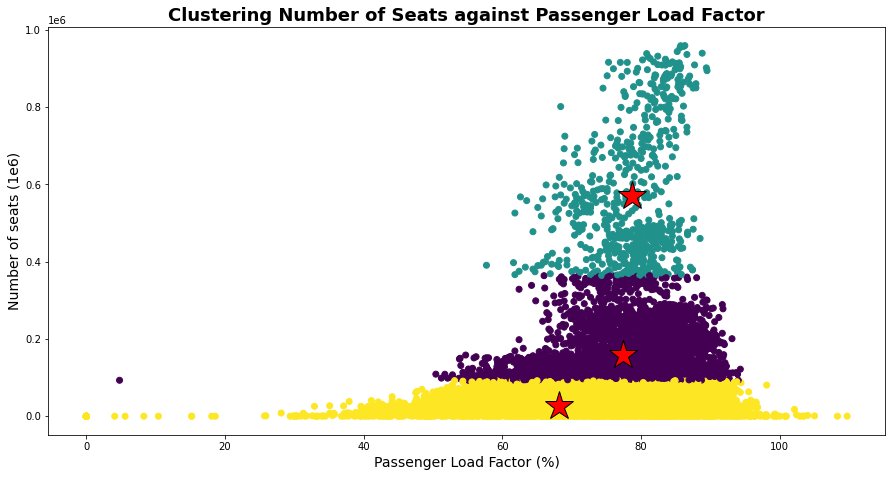

In [40]:
# Run the K-means clustering over the dataset. k = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init="random").fit(data[["Seats", "Passenger_Load_Factor"]])

# Visualize
plt.scatter(x = data["Passenger_Load_Factor"], y = data["Seats"], c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(
kmeans.cluster_centers_[:,1],
kmeans.cluster_centers_[:,0],
'k*',
markerfacecolor='red',
markersize=30
)

plt.xlabel("Passenger Load Factor (%)", size=14)
plt.ylabel("Number of seats (1e6)", size=14)
plt.title("Clustering Number of Seats against Passenger Load Factor", weight="bold", size=18)
plt.show()

##### Answers and explanation
* I seperate the dataset into 3 clusters. After running K-means, we can see that the smaller the number of seats, the more varying the passenger load factor.
    * When the number of seats is between 0 and 100000, the passenger load factor can vary from 30% to over 100%
    * When the number of seats is between 100000 and 400000, the passenger load factor can only vary from 50% to over 90%
    * When the number of seats is between over 400000, the passenger load factor can only vary from 60% to around 90%